In [142]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/rasbt/'
                 'python-machine-learning-book-3rd-edition/'
                 'master/ch10/housing.data.txt',
                 header=None,
                 sep='\s+')

df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 
              'NOX', 'RM', 'AGE', 'DIS', 'RAD', 
              'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [143]:
df = df.iloc[0:10, 0:]

In [144]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311.0,15.2,386.71,17.10,18.9


In [176]:
class LinearRegressionGD(object):

    def __init__(self, eta=0.001, n_iter=2):
        self.eta = eta
        self.n_iter = n_iter

    def fit(self, X, y):
        self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []

        for i in range(self.n_iter):
            output = self.net_input(X)
            print("입력값 :", X)
            print("가중치_old :", self.w_[1:])
            print("절편_old :", self.w_[0])
            print("예측값 :",output)
            errors = (y - output)
            print("실제값-예측값 :",errors)
            self.w_[1:] += self.eta * X.T.dot(errors)
            print("입력값, errors 내적 :", X.T.dot(errors))
            print("가중치_new :",self.w_[1:])
            self.w_[0] += self.eta * errors.sum()
            print("절편_new :",self.w_[0])
            print(" ")
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return self.net_input(X)

In [177]:
X = df[['RM']].values
y = df['MEDV'].values

In [178]:
print(X)
print(X.shape)

[[6.575]
 [6.421]
 [7.185]
 [6.998]
 [7.147]
 [6.43 ]
 [6.012]
 [6.172]
 [5.631]
 [6.004]]
(10, 1)


In [179]:
print(y)
print(y.shape)

[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9]
(10,)


In [180]:
from sklearn.preprocessing import StandardScaler

sc_x = StandardScaler()
sc_y = StandardScaler()

In [181]:
X_std = sc_x.fit_transform(X)

In [182]:
import numpy as np
y_std = sc_y.fit_transform(y[:, np.newaxis]).flatten()

In [183]:
lr = LinearRegressionGD()
lr.fit(X_std, y_std)

입력값 : [[ 0.2358769 ]
 [-0.0732724 ]
 [ 1.46042931]
 [ 1.08503373]
 [ 1.38414571]
 [-0.05520523]
 [-0.89432475]
 [-0.57313068]
 [-1.65916814]
 [-0.91038445]]
가중치_old : [0.]
절편_old : 0.0
예측값 : [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
실제값-예측값 : [-0.37254328 -0.74508655  1.28837883  1.08658455  1.52121837  0.35702064
 -0.54329228  0.10865846 -1.53674101 -1.16419774]
입력값, errors 내적 : [9.14634899]
가중치_new : [0.00914635]
절편_new : 3.1086244689504384e-18
 
입력값 : [[ 0.2358769 ]
 [-0.0732724 ]
 [ 1.46042931]
 [ 1.08503373]
 [ 1.38414571]
 [-0.05520523]
 [-0.89432475]
 [-0.57313068]
 [-1.65916814]
 [-0.91038445]]
가중치_old : [0.00914635]
절편_old : 3.1086244689504384e-18
예측값 : [ 0.00215741 -0.00067017  0.0133576   0.0099241   0.01265988 -0.00050493
 -0.00817981 -0.00524205 -0.01517533 -0.00832669]
실제값-예측값 : [-0.37470069 -0.74441638  1.27502123  1.07666046  1.5085585   0.35752557
 -0.53511247  0.11390051 -1.52156568 -1.15587104]
입력값, errors 내적 : [9.0548855]
가중치_new : [0.01820123]
절편_new : 6.217248937900877e-18


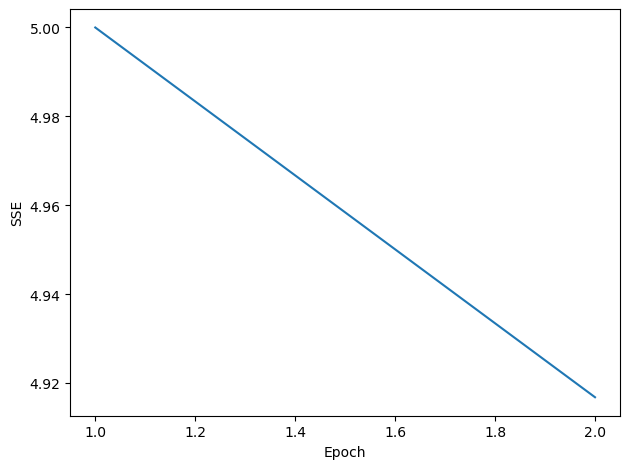

In [161]:
import matplotlib.pyplot as plt
plt.plot(range(1, lr.n_iter+1), lr.cost_)
plt.ylabel('SSE')
plt.xlabel('Epoch')
plt.tight_layout()
# plt.savefig('images/10_05.png', dpi=300)
plt.show()

In [11]:
def lin_regplot(X, y, model):
    plt.scatter(X, y, c='steelblue', edgecolor='white', s=70)
    plt.plot(X, model.predict(X), color='black', lw=2)    
    return 

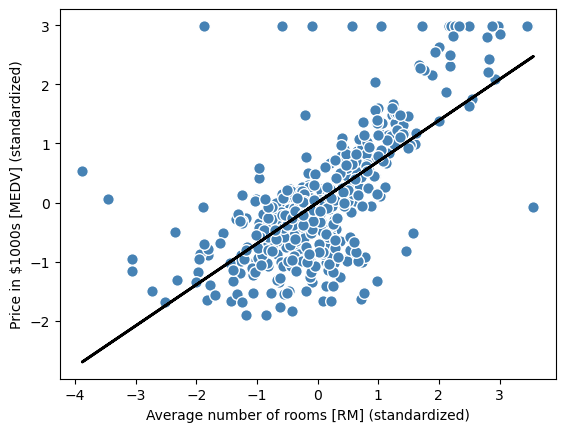

In [12]:
lin_regplot(X_std, y_std, lr)
plt.xlabel('Average number of rooms [RM] (standardized)')
plt.ylabel('Price in $1000s [MEDV] (standardized)')

# plt.savefig('images/10_06.png', dpi=300)
plt.show()

In [13]:
print('기울기: %.3f' % lr.w_[1])
print('절편: %.3f' % lr.w_[0])

기울기: 0.695
절편: -0.000


In [14]:
num_rooms_std = sc_x.transform(np.array([[5.0]]))
price_std = lr.predict(num_rooms_std)
print("$1,000 단위 가격: %.3f" % sc_y.inverse_transform(price_std.reshape(-1,1)))

$1,000 단위 가격: 10.840
